In [1]:
#Course  : DSC530
#Name : Tejashri Bhilare
#Week 10

#Chapter 12

#Exercises : Page 161: 12-1 , Page 161: 12-2


In [4]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/mj-clean.csv")

Downloaded mj-clean.csv


In [6]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

In [7]:
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [8]:
#The following function takes a DataFrame of transactions and compute daily averages.

def GroupByDay(transactions, func=np.mean):
    """Groups transactions by day and compute the daily mean ppg.

    transactions: DataFrame of transactions

    returns: DataFrame of daily prices
    """
    grouped = transactions[['date', 'ppg']].groupby('date')
    daily = grouped.aggregate(func)

    daily['date'] = daily.index
    start = daily.date[0]
    one_year = np.timedelta64(1, 'Y')
    daily['years'] = (daily.date - start) / one_year

    return daily

In [9]:
def GroupByQualityAndDay(transactions):
    """Divides transactions by quality and computes mean daily price.

    transaction: DataFrame of transactions
    
    returns: map from quality to time series of ppg
    """
    groups = transactions.groupby('quality')
    dailies = {}
    for name, group in groups:
        dailies[name] = GroupByDay(group)        

    return dailies

In [10]:
#dailies is the map from quality name to DataFrame

dailies = GroupByQualityAndDay(transactions)

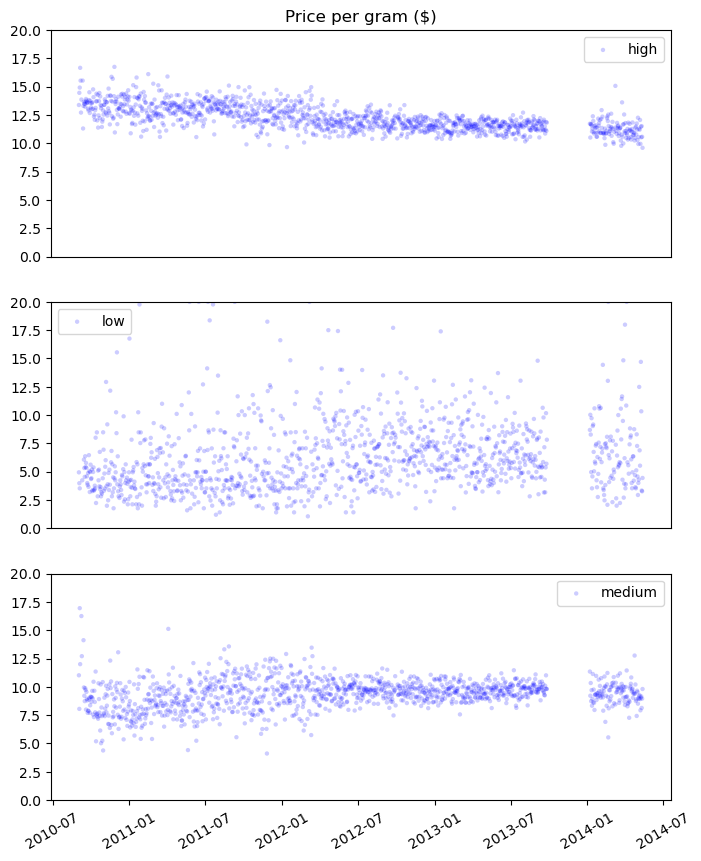

In [11]:
#The following plots the daily average price for each quality.
import matplotlib.pyplot as plt

thinkplot.PrePlot(rows=3)
for i, (name, daily) in enumerate(dailies.items()):
    thinkplot.SubPlot(i+1)
    title = 'Price per gram ($)' if i == 0 else ''
    thinkplot.Config(ylim=[0, 20], title=title)
    thinkplot.Scatter(daily.ppg, s=10, label=name)
    if i == 2: 
        plt.xticks(rotation=30)
        thinkplot.Config()
    else:
        thinkplot.Config(xticks=[])

We can use `statsmodels` to run a linear model of price as a function of time.

In [12]:
#We can use statsmodels to run a linear model of price as a function of time.

import statsmodels.formula.api as smf

def RunLinearModel(daily):
    model = smf.ols('ppg ~ years', data=daily)
    results = model.fit()
    return model, results

In [13]:
#Here's what the results look like.

from IPython.display import display

for name, daily in dailies.items():
    model, results = RunLinearModel(daily)
    print(name)
    display(results.summary())

high


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     989.7
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          3.69e-160
Time:                        22:33:27   Log-Likelihood:                -1510.1
No. Observations:                1241   AIC:                             3024.
Df Residuals:                    1239   BIC:                             3035.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.4496      0.045    296.080      0.000      13.361      13.539
years         -0.7077      0.022    -31.460      0.000      -0.752      -0.664
==============================================================================
Omnibus:                       56.254   Durbin-Watson:                   1.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.992
Skew:                           0.252   Prob(JB):                     9.76e-29
Kurtosis:                       4.497   Cond. No.                         4.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

low


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     35.90
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           2.76e-09
Time:                        22:33:27   Log-Likelihood:                -3091.3
No. Observations:                1179   AIC:                             6187.
Df Residuals:                    1177   BIC:                             6197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3616      0.194     27.671      0.000       4.981       5.742
years          0.5680      0.095      5.991      0.000       0.382       0.754
==============================================================================
Omnibus:                      649.338   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6347.614
Skew:                           2.373   Prob(JB):                         0.00
Kurtosis:                      13.329   Cond. No.                         4.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

medium


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     64.92
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.82e-15
Time:                        22:33:27   Log-Likelihood:                -2053.9
No. Observations:                1238   AIC:                             4112.
Df Residuals:                    1236   BIC:                             4122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.8791      0.071    125.043      0.000       8.740       9.018
years          0.2830      0.035      8.057      0.000       0.214       0.352
==============================================================================
Omnibus:                      133.025   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              630.863
Skew:                           0.385   Prob(JB):                    1.02e-137
Kurtosis:                       6.411   Cond. No.                         4.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
#Now let's plot the fitted model with the data.

def PlotFittedValues(model, results, label=''):
    """Plots original data and fitted values.

    model: StatsModel model object
    results: StatsModel results object
    """
    years = model.exog[:,1]
    values = model.endog
    thinkplot.Scatter(years, values, s=15, label=label)
    thinkplot.Plot(years, results.fittedvalues, label='model', color='#ff7f00')

In [15]:
#The following function plots the original data and the fitted curve.

def PlotLinearModel(daily, name):
    """Plots a linear fit to a sequence of prices, and the residuals.
    
    daily: DataFrame of daily prices
    name: string
    """
    model, results = RunLinearModel(daily)
    PlotFittedValues(model, results, label=name)
    thinkplot.Config(title='Fitted values',
                     xlabel='Years',
                     xlim=[-0.1, 3.8],
                     ylabel='Price per gram ($)')

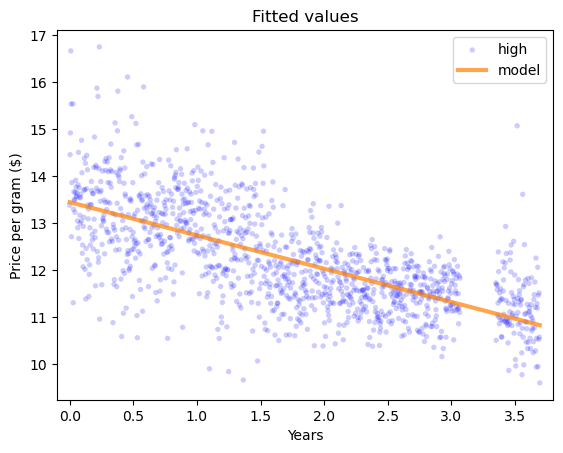

In [16]:
#Here are results for the high quality category:

name = 'high'
daily = dailies[name]

PlotLinearModel(daily, name)

In [22]:
#Moving averages
#As a simple example, lets see the rolling average of the numbers from 1 to 10.

array = np.arange(10)

In [23]:
#With a "window" of size 3, we get the average of the previous 3 elements, or nan when there are fewer than 3.

series = pd.Series(array)
series.rolling(3).mean()

0    NaN
1    NaN
2    1.0
3    2.0
4    3.0
5    4.0
6    5.0
7    6.0
8    7.0
9    8.0
dtype: float64

The following function plots the rolling mean.

In [26]:
def PlotRollingMean(daily, name):
    """Plots rolling mean.

    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    thinkplot.Scatter(reindexed.ppg, s=15, alpha=0.2, label=name)
    roll_mean = pd.Series(reindexed.ppg).rolling(30).mean()
    thinkplot.Plot(roll_mean, label="rolling mean", color="#ff7f00")
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel="price per gram ($)")

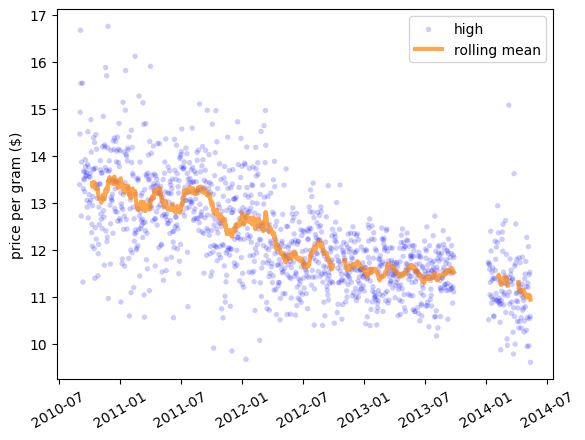

In [27]:
#Here's what it looks like for the high quality category.

PlotRollingMean(daily, name)

In [28]:
def PlotEWMA(daily, name):
    """Plots rolling mean.

    daily: DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    thinkplot.Scatter(reindexed.ppg, s=15, alpha=0.2, label=name)
    roll_mean = reindexed.ppg.ewm(30).mean()
    thinkplot.Plot(roll_mean, label="EWMA", color="#ff7f00")
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel="price per gram ($)")

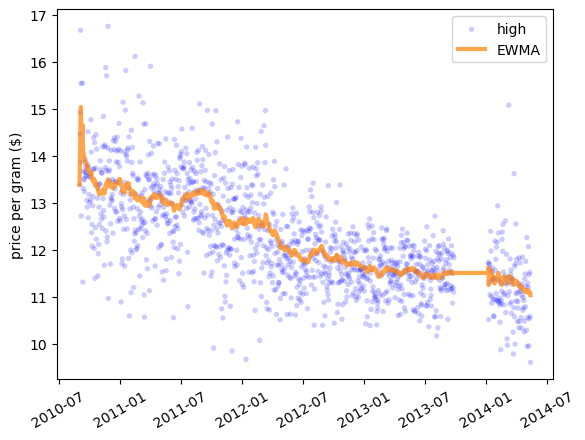

In [29]:
PlotEWMA(daily, name)

In [ ]:
#We can use resampling to generate missing values with the right amount of noise.

In [30]:
def FillMissing(daily, span=30):
    """Fills missing values with an exponentially weighted moving average.

    Resulting DataFrame has new columns 'ewma' and 'resid'.

    daily: DataFrame of daily prices
    span: window size (sort of) passed to ewma

    returns: new DataFrame of daily prices
    """
    dates = pd.date_range(daily.index.min(), daily.index.max())
    reindexed = daily.reindex(dates)

    ewma = pd.Series(reindexed.ppg).ewm(span=span).mean()

    resid = (reindexed.ppg - ewma).dropna()
    fake_data = ewma + thinkstats2.Resample(resid, len(reindexed))
    reindexed.ppg.fillna(fake_data, inplace=True)

    reindexed["ewma"] = ewma
    reindexed["resid"] = reindexed.ppg - ewma
    return reindexed

In [31]:
def PlotFilled(daily, name):
    """Plots the EWMA and filled data.

    daily: DataFrame of daily prices
    """
    filled = FillMissing(daily, span=30)
    thinkplot.Scatter(filled.ppg, s=15, alpha=0.2, label=name)
    thinkplot.Plot(filled.ewma, label="EWMA", color="#ff7f00")
    plt.xticks(rotation=30)
    thinkplot.Config(ylabel="Price per gram ($)")

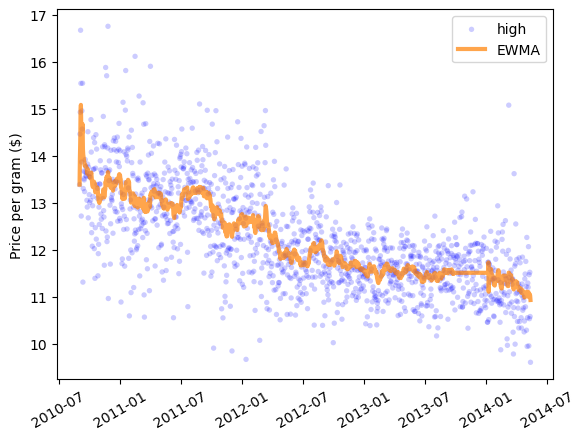

In [32]:
#Here's what the EWMA model looks like with missing values filled.

PlotFilled(daily, name)

In [33]:
#Serial correlation
#The following function computes serial correlation with the given lag.

def SerialCorr(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = thinkstats2.Corr(xs, ys)
    return corr

In [34]:
#Before computing correlations, we'll fill missing values.
filled_dailies = {}
for name, daily in dailies.items():
    filled_dailies[name] = FillMissing(daily, span=30)

In [35]:
#Here are the serial correlations for raw price data.

for name, filled in filled_dailies.items():            
    corr = thinkstats2.SerialCorr(filled.ppg, lag=1)
    print(name, corr)

high 0.4956195564183801
low 0.09999961334167366
medium 0.17636004624899784


In [36]:
for name, filled in filled_dailies.items():            
    corr = thinkstats2.SerialCorr(filled.resid, lag=1)
    print(name, corr)

high -0.01100491103044664
low 0.035460014321226974
medium -0.009626834222066595


In [37]:
#Even if the correlations between consecutive days are weak, there might be correlations across intervals of one week, one month, or one year

rows = []
for lag in [1, 7, 30, 365]:
    print(lag, end='\t')
    for name, filled in filled_dailies.items():            
        corr = SerialCorr(filled.resid, lag)
        print('%.2g' % corr, end='\t')
    print()

1	-0.011	0.035	-0.0096	
7	0.0042	-0.022	-0.037	
30	0.0036	0.0019	-0.0019	
365	0.062	0.045	0.018	


In [ ]:
#The strongest correlation is a weekly cycle in the medium quality category.

In [39]:
#Autocorrelation
#The autocorrelation function is the serial correlation computed for all lags.

#We can use it to replicate the results from the previous section.

import statsmodels.tsa.stattools as smtsa

filled = filled_dailies["high"]
acf = smtsa.acf(filled.resid, nlags=365, adjusted=True, fft=False)
print("%0.2g, %.2g, %0.2g, %0.2g, %0.2g" % (acf[0], acf[1], acf[7], acf[30], acf[365]))

1, -0.011, 0.0042, 0.0036, 0.06


In [40]:
def SimulateAutocorrelation(daily, iters=1001, nlags=40):
    """Resample residuals, compute autocorrelation, and plot percentiles.

    daily: DataFrame
    iters: number of simulations to run
    nlags: maximum lags to compute autocorrelation
    """
    # run simulations
    t = []
    for _ in range(iters):
        filled = FillMissing(daily, span=30)
        resid = thinkstats2.Resample(filled.resid)
        acf = smtsa.acf(resid, nlags=nlags, adjusted=True, fft=False)[1:]
        t.append(np.abs(acf))

    high = thinkstats2.PercentileRows(t, [97.5])[0]
    low = -high
    lags = range(1, nlags + 1)
    thinkplot.FillBetween(lags, low, high, alpha=0.2, color="gray")

In [ ]:
#The following function plots the actual autocorrelation for lags up to 40 days.

#The flag add_weekly indicates whether we should add a simulated weekly cycle.

In [41]:
def PlotAutoCorrelation(dailies, nlags=40, add_weekly=False):
    """Plots autocorrelation functions.

    dailies: map from category name to DataFrame of daily prices
    nlags: number of lags to compute
    add_weekly: boolean, whether to add a simulated weekly pattern
    """
    thinkplot.PrePlot(3)
    daily = dailies["high"]
    SimulateAutocorrelation(daily)

    for name, daily in dailies.items():

        if add_weekly:
            daily.ppg = AddWeeklySeasonality(daily)

        filled = FillMissing(daily, span=30)

        acf = smtsa.acf(filled.resid, nlags=nlags, adjusted=True, fft=False)
        lags = np.arange(len(acf))
        thinkplot.Plot(lags[1:], acf[1:], label=name)

In [ ]:
#To show what a strong weekly cycle would look like, we have the option of adding a price increase of 1-2 dollars on Friday and Saturdays.

In [42]:
def AddWeeklySeasonality(daily):
    """Adds a weekly pattern.

    daily: DataFrame of daily prices

    returns: new DataFrame of daily prices
    """
    fri_or_sat = (daily.index.dayofweek == 4) | (daily.index.dayofweek == 5)
    fake = daily.ppg.copy()
    fake[fri_or_sat] += np.random.uniform(0, 2, fri_or_sat.sum())
    return fake

In [ ]:
#Here's what the real ACFs look like. The gray regions indicate the levels we expect by chance.

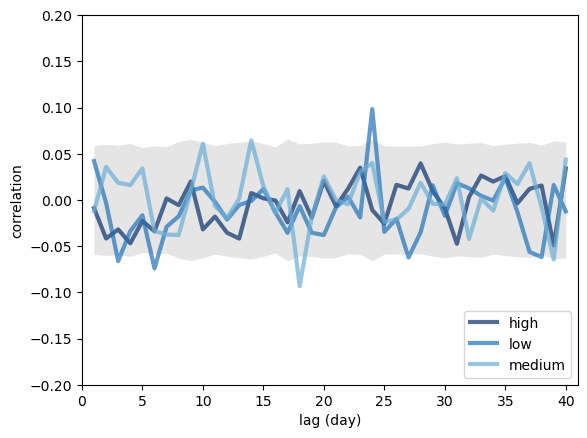

In [43]:
axis = [0, 41, -0.2, 0.2]

PlotAutoCorrelation(dailies, add_weekly=False)
thinkplot.Config(axis=axis, loc="lower right", ylabel="correlation", xlabel="lag (day)")

In [ ]:
#Here's what it would look like if there were a weekly cycle.

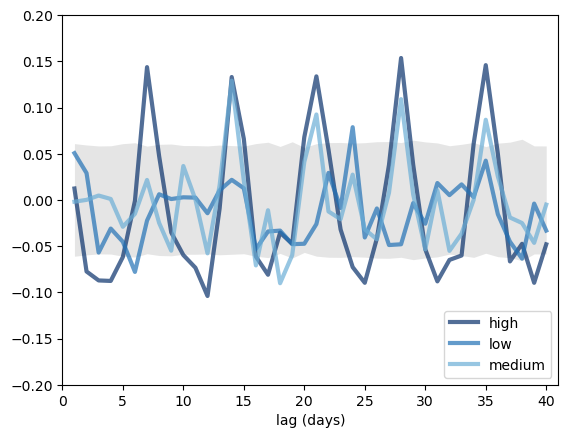

In [44]:
PlotAutoCorrelation(dailies, add_weekly=True)
thinkplot.Config(axis=axis, loc="lower right", xlabel="lag (days)")

In [ ]:
#Prediction
#The simplest way to generate predictions is to use statsmodels to fit a model to the data, then use the predict method from the results.

In [45]:
def GenerateSimplePrediction(results, years):
    """Generates a simple prediction.

    results: results object
    years: sequence of times (in years) to make predictions for

    returns: sequence of predicted values
    """
    n = len(years)
    inter = np.ones(n)
    d = dict(Intercept=inter, years=years, years2=years**2)
    predict_df = pd.DataFrame(d)
    predict = results.predict(predict_df)
    return predict

In [46]:
def PlotSimplePrediction(results, years):
    predict = GenerateSimplePrediction(results, years)

    thinkplot.Scatter(daily.years, daily.ppg, alpha=0.2, label=name)
    thinkplot.plot(years, predict, color="#ff7f00")
    xlim = years[0] - 0.1, years[-1] + 0.1
    thinkplot.Config(
        title="Predictions",
        xlabel="Years",
        xlim=xlim,
        ylabel="Price per gram ($)",
        loc="upper right",
    )

In [ ]:
#Here's what the prediction looks like for the high quality category, using the linear model.

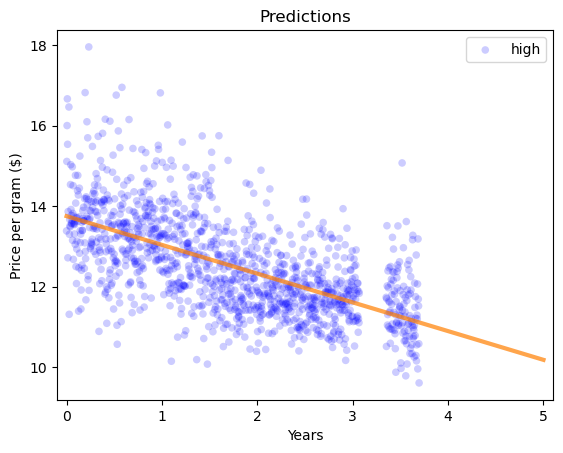

In [47]:
name = "high"
daily = dailies[name]

_, results = RunLinearModel(daily)
years = np.linspace(0, 5, 101)
PlotSimplePrediction(results, years)

In [ ]:
#When we generate predictions, we want to quatify the uncertainty in the prediction. We can do that by resampling. The following function fits a model to the data, computes residuals, then resamples from the residuals to general fake datasets.
#It fits the same model to each fake dataset and returns a list of results.

In [48]:
def SimulateResults(daily, iters=101, func=RunLinearModel):
    """Run simulations based on resampling residuals.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    _, results = func(daily)
    fake = daily.copy()

    result_seq = []
    for _ in range(iters):
        fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
        _, fake_results = func(fake)
        result_seq.append(fake_results)

    return result_seq

In [ ]:
#To generate predictions, we take the list of results fitted to resampled data. For each model, we use the predict method to generate predictions, and return a sequence of predictions.

#If add_resid is true, we add resampled residuals to the predicted values, which generates predictions that include predictive uncertainty (due to random noise) as well as modeling uncertainty (due to random sampling).

In [49]:
def GeneratePredictions(result_seq, years, add_resid=False):
    """Generates an array of predicted values from a list of model results.

    When add_resid is False, predictions represent sampling error only.

    When add_resid is True, they also include residual error (which is
    more relevant to prediction).

    result_seq: list of model results
    years: sequence of times (in years) to make predictions for
    add_resid: boolean, whether to add in resampled residuals

    returns: sequence of predictions
    """
    n = len(years)
    d = dict(Intercept=np.ones(n), years=years, years2=years**2)
    predict_df = pd.DataFrame(d)

    predict_seq = []
    for fake_results in result_seq:
        predict = fake_results.predict(predict_df)
        if add_resid:
            predict += thinkstats2.Resample(fake_results.resid, n)
        predict_seq.append(predict)

    return predict_seq

In [ ]:
#To visualize predictions, I show a darker region that quantifies modeling uncertainty and a lighter region that quantifies predictive uncertainty.

In [50]:
def PlotPredictions(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateResults(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.3, color="gray")

    predict_seq = GeneratePredictions(result_seq, years, add_resid=False)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.5, color="gray")

In [ ]:
#Here are the results for the high quality category.

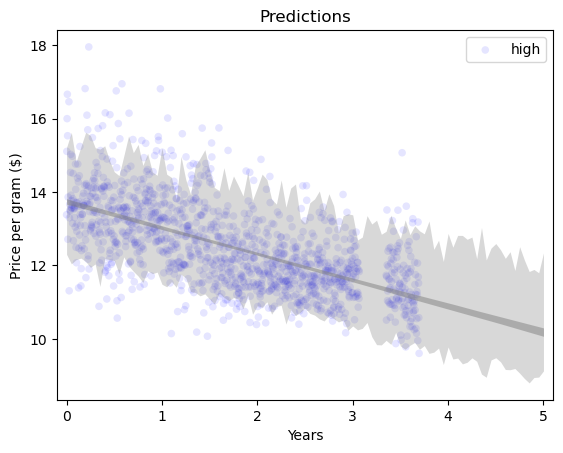

In [51]:
years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

In [ ]:
#The following function generates a sequence of models based on different amounts of past data.

In [52]:
def SimulateIntervals(daily, iters=101, func=RunLinearModel):
    """Run simulations based on different subsets of the data.

    daily: DataFrame of daily prices
    iters: number of simulations
    func: function that fits a model to the data

    returns: list of result objects
    """
    result_seq = []
    starts = np.linspace(0, len(daily), iters).astype(int)

    for start in starts[:-2]:
        subset = daily[start:]
        _, results = func(subset)
        fake = subset.copy()

        for _ in range(iters):
            fake.ppg = results.fittedvalues + thinkstats2.Resample(results.resid)
            _, fake_results = func(fake)
            result_seq.append(fake_results)

    return result_seq

In [ ]:
#And this function plots the results.

In [53]:
def PlotIntervals(daily, years, iters=101, percent=90, func=RunLinearModel):
    """Plots predictions based on different intervals.

    daily: DataFrame of daily prices
    years: sequence of times (in years) to make predictions for
    iters: number of simulations
    percent: what percentile range to show
    func: function that fits a model to the data
    """
    result_seq = SimulateIntervals(daily, iters=iters, func=func)
    p = (100 - percent) / 2
    percents = p, 100 - p

    predict_seq = GeneratePredictions(result_seq, years, add_resid=True)
    low, high = thinkstats2.PercentileRows(predict_seq, percents)
    thinkplot.FillBetween(years, low, high, alpha=0.2, color="gray")

In [ ]:
#Here's what the high quality category looks like if we take into account uncertainty about how much past data to use.

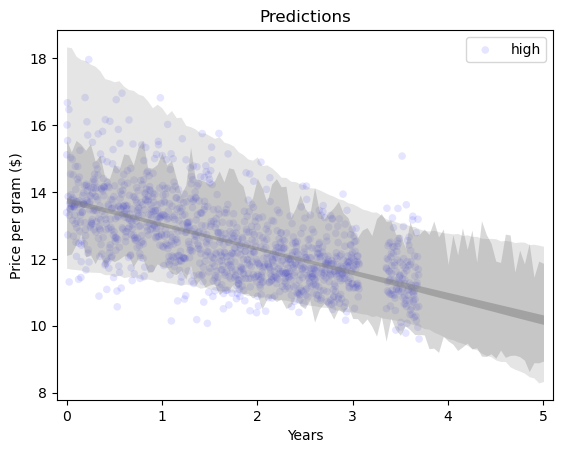

In [54]:
name = "high"
daily = dailies[name]

thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotIntervals(daily, years)
PlotPredictions(daily, years)
xlim = years[0] - 0.1, years[-1] + 0.1
thinkplot.Config(
    title="Predictions", xlabel="Years", xlim=xlim, ylabel="Price per gram ($)"
)

## Exercises

In [ ]:
#Exercise :12.1 : Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. 
#You will have to write a version of RunLinearModel that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [55]:
# Solution

def RunQuadraticModel(daily):
    """Runs a linear model of prices versus years.

    daily: DataFrame of daily prices

    returns: model, results
    """
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results

In [56]:
# Solution

name = 'high'
daily = dailies[name]

model, results = RunQuadraticModel(daily)
results.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     372.2
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          2.79e-127
Time:                        23:08:08   Log-Likelihood:                -1711.4
No. Observations:                1241   AIC:                             3429.
Df Residuals:                    1238   BIC:                             3444.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.9797      0.079    176.734      0.000      13.824      14.135
years         -1.0913      0.100    -10.963      0.000      -1.287      -0.896
years2         0.1042      0.027      3.926      0.000       0.052       0.156
==============================================================================
Omnibus:                       89.050   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.544
Skew:                           0.570   Prob(JB):                     2.73e-29
Kurtosis:                       4.116   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

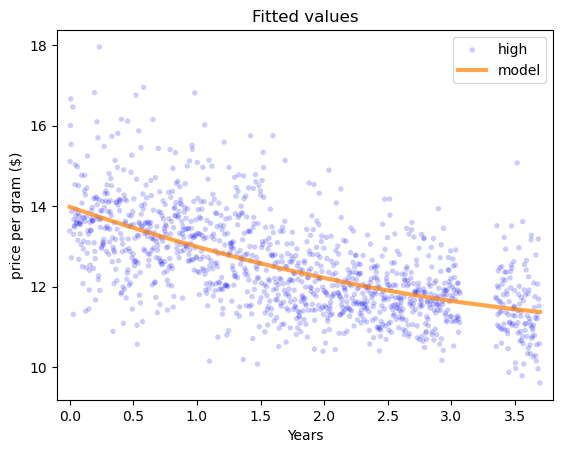

In [57]:
# Solution

PlotFittedValues(model, results, label=name)
thinkplot.Config(title='Fitted values',
                 xlabel='Years',
                 xlim=[-0.1, 3.8],
                 ylabel='price per gram ($)')

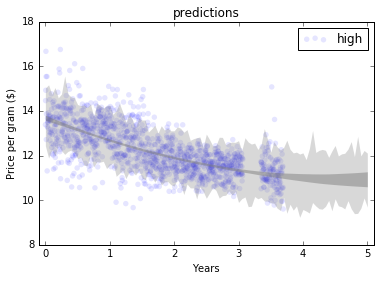

In [45]:
# Solution

years = np.linspace(0, 5, 101)
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(title='predictions',
                 xlabel='Years',
                 xlim=[years[0]-0.1, years[-1]+0.1],
                 ylabel='Price per gram ($)')

In [ ]:
#Exercise:12.2 - Write a definition for a class named SerialCorrelationTest that extends HypothesisTest from Section 9.2. It should take a series and a lag as data, compute the serial correlation of the series with the given lag, and then compute the p-value of the observed correlation.

#Use this class to test whether the serial correlation in raw price data is statistically significant. Also test the residuals of the linear model and (if you did the previous exercise), the quadratic model.

In [58]:
# Solution

class SerialCorrelationTest(thinkstats2.HypothesisTest):
    """Tests serial correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        series, lag = data
        test_stat = abs(SerialCorr(series, lag))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        series, lag = self.data
        permutation = series.reindex(np.random.permutation(series.index))
        return permutation, lag

In [59]:
# Solution

# test the correlation between consecutive prices

name = 'high'
daily = dailies[name]

series = daily.ppg
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.4212499488314483 0.0


In [60]:
# Solution

# test for serial correlation in residuals of the linear model

_, results = RunLinearModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)    

0.08602473816439489 0.003


In [61]:
# Solution

# test for serial correlation in residuals of the quadratic model

_, results = RunQuadraticModel(daily)
series = results.resid
test = SerialCorrelationTest((series, 1))
pvalue = test.PValue()
print(test.actual, pvalue)

0.07420578280610707 0.018
